# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


589

In [3]:
print(cities)

['eureka', 'saint-philippe', 'atuona', 'thompson', 'dikson', 'mataura', 'hobart', 'chuy', 'saskylakh', 'marmora', 'illoqqortoormiut', 'tuktoyaktuk', 'bredasdorp', 'berlevag', 'kirs', 'amderma', 'kapaa', 'hithadhoo', 'severo-kurilsk', 'faya', 'toliary', 'yellowknife', 'provideniya', 'ilulissat', 'sitka', 'rikitea', 'waipawa', 'bacuit', 'severo-yeniseyskiy', 'bambous virieux', 'olavarria', 'kurilsk', 'lolua', 'tsihombe', 'grand river south east', 'samusu', 'hermanus', 'pacific grove', 'dingli', 'albany', 'touros', 'pangnirtung', 'inhambane', 'torbay', 'ushuaia', 'kahului', 'yanchukan', 'hasaki', 'taolanaro', 'anadyr', 'port elizabeth', 'butaritari', 'deputatskiy', 'new norfolk', 'port alfred', 'barentsburg', 'altus', 'bereda', 'lagos', 'puerto ayora', 'adrar', 'ola', 'texarkana', 'awjilah', 'quatre cocos', 'hofn', 'busselton', 'cape town', 'cherskiy', 'kodiak', 'gravdal', 'kieta', 'walvis bay', 'newcastle', 'samalaeulu', 'makat', 'hobyo', 'san patricio', 'vaitupu', 'narsaq', 'yuksekova',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
import json
import requests

from api_keys import weather_api_key
from urllib.error import HTTPError
#weather_api_key = a48e24767ec9494ca8be13ca3d87fa76
# Build query URL
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid="+ weather_api_key +"&units=imperial&q="

# Lists for the dataframe
citylist = []
cloudiness = []
dates = []
humidity = []
lats = []
longs = []
max_temps = []
windspeeds = []
countries = []

# Initial counters
counter = 0

# Loop for calling data city by city
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        windspeeds.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        citylist.append(city)
        counter = counter + 1   
        
        print(f"Processing Record {counter} | {city}")
    except Exception:
        print("City way too small for wx data. Skipping...")

  

Processing Record 1 | eureka
Processing Record 2 | saint-philippe
Processing Record 3 | atuona
Processing Record 4 | thompson
Processing Record 5 | dikson
Processing Record 6 | mataura
Processing Record 7 | hobart
Processing Record 8 | chuy
Processing Record 9 | saskylakh
Processing Record 10 | marmora
City way too small for wx data. Skipping...
Processing Record 11 | tuktoyaktuk
Processing Record 12 | bredasdorp
Processing Record 13 | berlevag
Processing Record 14 | kirs
City way too small for wx data. Skipping...
Processing Record 15 | kapaa
Processing Record 16 | hithadhoo
Processing Record 17 | severo-kurilsk
Processing Record 18 | faya
City way too small for wx data. Skipping...
Processing Record 19 | yellowknife
Processing Record 20 | provideniya
Processing Record 21 | ilulissat
Processing Record 22 | sitka
Processing Record 23 | rikitea
Processing Record 24 | waipawa
City way too small for wx data. Skipping...
Processing Record 25 | severo-yeniseyskiy
Processing Record 26 | bamb

Processing Record 215 | coquimbo
Processing Record 216 | sao joao da barra
Processing Record 217 | clyde river
Processing Record 218 | darhan
Processing Record 219 | nelson bay
Processing Record 220 | akureyri
Processing Record 221 | beringovskiy
Processing Record 222 | kyakhta
Processing Record 223 | naters
Processing Record 224 | san vicente de canete
City way too small for wx data. Skipping...
Processing Record 225 | mahebourg
Processing Record 226 | upernavik
Processing Record 227 | kaniama
Processing Record 228 | honiara
Processing Record 229 | cayenne
Processing Record 230 | siocon
Processing Record 231 | libenge
Processing Record 232 | nhulunbuy
Processing Record 233 | asau
Processing Record 234 | cidreira
Processing Record 235 | viedma
Processing Record 236 | pervomayskoye
City way too small for wx data. Skipping...
Processing Record 237 | kampot
Processing Record 238 | college
Processing Record 239 | mangaluru
Processing Record 240 | ormara
Processing Record 241 | kavieng
Proc

City way too small for wx data. Skipping...
Processing Record 435 | nuuk
Processing Record 436 | patu
Processing Record 437 | rioja
City way too small for wx data. Skipping...
Processing Record 438 | aykhal
Processing Record 439 | merauke
Processing Record 440 | teya
Processing Record 441 | irtyshskiy
Processing Record 442 | ziarat
Processing Record 443 | nyurba
Processing Record 444 | guane
Processing Record 445 | san luis
Processing Record 446 | kavaratti
Processing Record 447 | de-kastri
Processing Record 448 | bonavista
Processing Record 449 | elizabeth city
Processing Record 450 | america dourada
Processing Record 451 | garden city
Processing Record 452 | zhigansk
Processing Record 453 | belmonte
Processing Record 454 | ust-kuyga
Processing Record 455 | kashi
Processing Record 456 | williston
Processing Record 457 | rocha
Processing Record 458 | vila franca do campo
Processing Record 459 | komsomolskoye
Processing Record 460 | north bend
Processing Record 461 | fraga
City way too 

In [6]:
# Data retrieval verification

print(f"The windspeed information received is: {windspeeds}") 

The windspeed information received is: [1.99, 23.04, 19.28, 9.17, 3.89, 4.68, 14.99, 7.81, 14.65, 10.29, 6.55, 3.36, 20.8, 3.69, 10.29, 9.6, 23.26, 1.83, 4.7, 4.47, 6.93, 6.93, 16.31, 2.24, 3.58, 16.11, 11.07, 9.08, 1.36, 1.01, 6.93, 9.17, 2.62, 6.93, 5.82, 7.2, 13.87, 8.05, 9.17, 10.29, 15.66, 8.68, 10.27, 1.81, 1.68, 8.68, 9.17, 3, 2.24, 11.41, 10.38, 7.74, 8.05, 11.48, 11.14, 5.01, 12.75, 3.8, 8.1, 12.75, 6.46, 5.82, 4.83, 17.22, 12.08, 16.11, 4.7, 3.94, 1.61, 30.65, 10.29, 2.24, 15.23, 7.67, 10.29, 1.07, 0.67, 8.79, 16.11, 4.85, 11.41, 15.57, 5.57, 14.29, 3.36, 17.98, 1.07, 18.05, 7, 12.75, 10.29, 8.68, 12.75, 1.01, 3.44, 6.93, 13.87, 8.57, 3.11, 10.29, 9.17, 14.99, 8.05, 8.08, 8.79, 6.93, 7.92, 8.05, 7, 10.29, 4.05, 8.05, 6.93, 20.02, 5.12, 6.69, 1.36, 3.36, 5.82, 4.85, 4.7, 9.17, 16.11, 6.93, 11.41, 15.14, 15.93, 9.17, 23.04, 17.22, 1.68, 5.41, 13.24, 16.55, 0.18, 10.87, 11.39, 3.15, 16.11, 4.74, 1.79, 16.64, 1.99, 8.95, 6.93, 2.24, 15.01, 1.01, 9.26, 2.59, 6.93, 19.46, 4.12, 11.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Create a dataframe to store the data
wx = {"City":citylist,"Lat":lats,"Long":longs,"Cloudiness":cloudiness,"Humidity":humidity,"Max Temp":max_temps,"Wind Speed":windspeeds, "Date":dates,}

weather_df = pd.DataFrame(wx)


In [8]:
#Preview the dataframe
weather_df.head()

,City,Lat,Long,Cloudiness,Humidity,Max Temp,Wind Speed,Date
0,eureka,40.80,-124.16,100,90,55.99,1.99,1607553202
1,saint-philippe,-21.36,55.77,90,83,73.40,23.04,1607553202
2,atuona,-9.80,-139.03,1,74,78.94,19.28,1607553202
3,thompson,55.74,-97.86,90,92,26.60,9.17,1607553001
4,dikson,73.51,80.55,1,87,-11.60,3.89,1607553203


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df.sort_values(by=['Humidity'], ascending=False)


,City,Lat,Long,Cloudiness,Humidity,Max Temp,Wind Speed,Date
47,bereda,43.27,-7.54,100,100,52.00,3.00,1607553213
279,porto novo,41.15,-8.61,75,100,57.20,12.75,1607553107
315,belen,36.49,36.22,20,100,42.80,5.82,1607553268
66,yuksekova,37.57,44.29,20,100,28.40,4.70,1607553217
145,hambantota,6.12,81.12,40,100,75.20,2.24,1607553233
...,...,...,...,...,...,...,...,...
105,lompoc,34.64,-120.46,1,15,78.80,6.93,1607552935
77,anahuac,27.23,-100.15,40,14,78.80,8.79,1607553089
232,asau,46.43,26.40,100,12,30.00,2.44,1607553252
177,nosy varika,51.99,20.80,44,10,30.99,14.00,1607553240


In [10]:
#  Get the indices of cities that have humidity over 100%.
weather_df[weather_df['Humidity'] == 100]

,City,Lat,Long,Cloudiness,Humidity,Max Temp,Wind Speed,Date
9,marmora,44.46,7.09,33,100,37.4,10.29,1607553204
47,bereda,43.27,-7.54,100,100,52.0,3.00,1607553213
66,yuksekova,37.57,44.29,20,100,28.4,4.70,1607553217
145,hambantota,6.12,81.12,40,100,75.2,2.24,1607553233
175,bismil,37.85,40.67,90,100,42.8,4.70,1607553239
279,porto novo,41.15,-8.61,75,100,57.2,12.75,1607553107
315,belen,36.49,36.22,20,100,42.8,5.82,1607553268
323,miri,4.41,114.01,40,100,75.2,3.36,1607553270
427,sibu,2.30,111.82,40,100,77.0,2.24,1607553290
474,areosa,41.72,-8.86,75,100,64.0,12.75,1607553300


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

clean_weather_df = weather_df[weather_df['Humidity'] != 100]
clean_weather_df.sort_values(by=['Humidity'], ascending=False)     

,City,Lat,Long,Cloudiness,Humidity,Max Temp,Wind Speed,Date
426,buchloe,48.03,10.73,99,99,33.01,6.93,1607553290
422,mittersill,47.27,12.48,91,98,32.00,2.24,1607553289
269,tegh,39.56,46.48,99,98,27.05,1.57,1607553259
342,synya,65.37,58.04,99,98,21.43,5.93,1607553274
196,tilichiki,60.47,166.10,97,97,10.33,11.10,1607553045
...,...,...,...,...,...,...,...,...
368,ojinaga,29.57,-104.42,1,15,71.60,9.17,1607553279
77,anahuac,27.23,-100.15,40,14,78.80,8.79,1607553089
232,asau,46.43,26.40,100,12,30.00,2.44,1607553252
177,nosy varika,51.99,20.80,44,10,30.99,14.00,1607553240


In [12]:
clean_weather_df.sort_values(by=['Max Temp'], ascending=False)

,City,Lat,Long,Cloudiness,Humidity,Max Temp,Wind Speed,Date
436,rioja,-29.41,-66.85,0,22,92.84,5.46,1607553292
181,lorengau,-2.02,147.27,87,61,86.05,3.38,1607553241
150,champerico,14.30,-91.92,75,70,86.00,6.93,1607553234
227,honiara,-9.43,159.95,20,74,86.00,5.82,1607553250
180,tiarei,-17.53,-149.33,75,58,86.00,18.34,1607553240
...,...,...,...,...,...,...,...,...
461,ust-nera,64.57,143.20,6,71,-35.63,2.06,1607553297
154,kysyl-syr,63.90,122.76,13,81,-37.70,2.10,1607553234
451,zhigansk,66.77,123.37,11,81,-37.73,2.62,1607553295
328,batagay,67.63,134.63,33,76,-39.59,3.06,1607553271


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

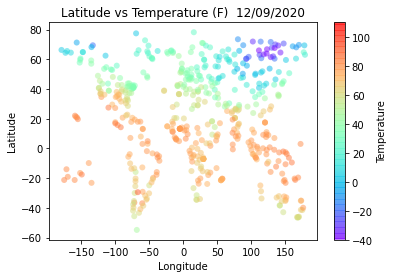

In [20]:
# Plotting cities by Lat and Long and visualizing tempertaure by color gave a more useful plot 
#    than latitude and tempertaure alone.

# Extract the data we're interested in
Lat, Long = clean_weather_df['Lat'], clean_weather_df['Long']
temperature = clean_weather_df['Max Temp']

# Scatter the points, using temperature color
plt.scatter(Long, Lat, label=None,
            c=temperature, cmap='rainbow',
            linewidth=0, alpha=0.5)

# Title and Labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Temperature')
plt.clim(-40, 110)
 
plt.title(f'Latitude vs Temperature (F)  {time.strftime("%m/%d/%Y")}');

# Save the figure
plt.savefig('Latitude vs.Temperature v1.png')

In [18]:
#'Latitude vs Temperature (F)' utlizes color to show maximum temperature distribution 
#   by Latitude, and, to a lesser degree, by Longitude. As expected the bands are relatively 
#   uniform horizontally with the exception of some longitudes with particularly cooler temperatures.

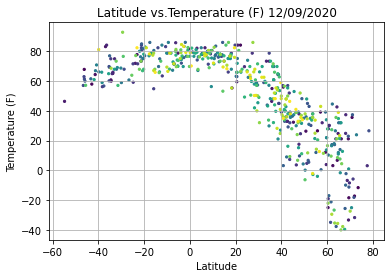

In [144]:
# Build a boring, less useful scatter plot 'Latitude vs.Temperature (F)'

# Number of cities in cleaned dataframe
n = len(clean_weather_df. index)
t= np.arange(n)  # color scale matched with number of data points

plt.scatter(clean_weather_df['Lat'], clean_weather_df['Max Temp'], s=5, c=t)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Latitude vs.Temperature (F) {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Save the figure
plt.savefig('Latitude vs.Temperature v2.png')

plt.show()

In [22]:
#'Latitude vs Temperature (F)' utlizes color to show maximum temperature distribution 
#   by Latitude. This is a less visually educational plot because all latitudes are 
#   grouped together but the colors do show temperature distribution.

## Latitude vs. Humidity Plot

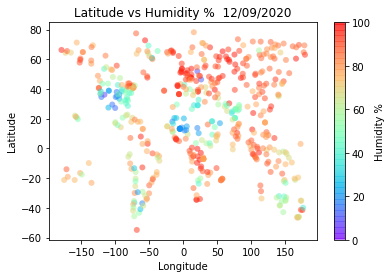

In [23]:
# Plotting cities by Lat and Long and visualizing humidity by color gave a more useful plot 
#    than latitude and tempertaure alone.
# Two dimensional scatterplot located in regression section.

# Extract the data we're interested in
Lat, Long = clean_weather_df['Lat'], clean_weather_df['Long']
hum = clean_weather_df['Humidity']

# Scatter the points, using Humidity
plt.scatter(Long, Lat, label=None,
            c=hum, cmap='rainbow',
            linewidth=0, alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Humidity %')
plt.clim(0, 100)
 
plt.title(f'Latitude vs Humidity %  {time.strftime("%m/%d/%Y")}');

# Save the figure
plt.savefig('Latitude vs.Humidity.png')

In [24]:
#'Latitude vs Humidity %' utlizes color to show humidity % distribution 
#   by Latitude, and, to a lesser degree, by Longitude. The plot visually
#   confers that humidity is not determined by latitude alone...longitude
#   plays an important role in the humidity a city will experience.

## Latitude vs. Cloudiness Plot

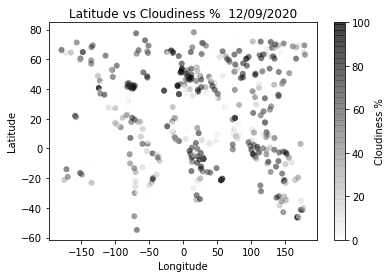

In [25]:
# Plotting cities by Lat and Long and visualizing cloudiness by color gave a more useful plot 
#    than latitude and tempertaure alone.
# Two dimensional scatterplot located in regression section.

# Extract the data we're interested in
Lat, Long = clean_weather_df['Lat'], clean_weather_df['Long']
cloud = clean_weather_df['Cloudiness']

# Scatter the points, using Cloudiness
plt.scatter(Long, Lat, label=None,
            c=cloud, cmap='binary',
            linewidth=0, alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cloudiness %')
plt.clim(0, 100)
 
plt.title(f'Latitude vs Cloudiness %  {time.strftime("%m/%d/%Y")}');

# Save the figure
plt.savefig('Latitude vs.Cloudiness.png')

In [26]:
#'Latitude vs Cloudiness %' utlizes color to show cloudiness % distribution 
#   by Latitude, and, to a lesser degree, by Longitude. The plot visually
#   confers that cloudiness is not primarily determined by latitude...longitude
#   appears to be the primary determinant of cloudiness.

In [27]:
clean_weather_df.sort_values(by=['Wind Speed'], ascending=False)

,City,Lat,Long,Cloudiness,Humidity,Max Temp,Wind Speed,Date
330,olafsvik,64.89,-23.71,100,88,34.84,31.83,1607553271
69,ostrovnoy,68.05,39.51,3,95,24.89,30.65,1607553217
381,morant bay,17.90,-76.43,75,73,77.00,25.28,1607553282
16,severo-kurilsk,50.68,156.12,72,87,26.37,23.26,1607553205
487,alofi,-19.06,-169.92,75,78,82.40,23.04,1607553302
...,...,...,...,...,...,...,...,...
441,ziarat,30.38,67.73,0,96,32.07,0.85,1607553293
76,khatanga,71.97,102.50,48,85,-31.70,0.67,1607553219
331,hutchinson,38.06,-97.93,1,16,69.80,0.65,1607553135
298,luebo,-5.35,21.42,100,93,70.21,0.51,1607553265


## Latitude vs. Wind Speed Plot

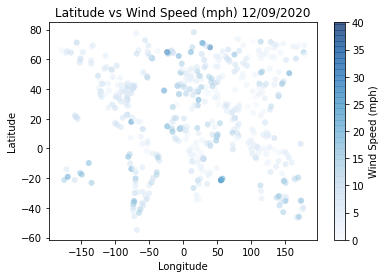

In [28]:
# Plotting cities by Lat and Long and visualizing wind speed by color gave a more useful plot 
#    than latitude and tempertaure alone.
# Two dimensional scatterplot located in regression section.

# Extract the data we're interested in
Lat, Long = clean_weather_df['Lat'], clean_weather_df['Long']
wind = clean_weather_df['Wind Speed']

# Scatter the points, using temperature color
plt.scatter(Long, Lat, label=None,
            c=wind, cmap='Blues',
            linewidth=0, alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Wind Speed (mph)')
plt.clim(0, 40)
 
plt.title(f'Latitude vs Wind Speed (mph) {time.strftime("%m/%d/%Y")}');

# Save the figure
plt.savefig('Latitude vs.Wind Speed.png')

In [29]:
#'Latitude vs Wind Speed' utlizes color to show wind speed distribution 
#   by Latitude, and, to a lesser degree, by Longitude. The plot visually
#   confers that wind speed is greater at the subtropical jets and indicated
#   by darker blue colors. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [30]:
# Dataframe for Northern Hemisphere cities
northtemp_df = weather_df[weather_df['Lat'] >= 0]
northtemp_df.sort_values(by=['Lat'])

,City,Lat,Long,Cloudiness,Humidity,Max Temp,Wind Speed,Date
495,bontang,0.13,117.50,78,83,79.12,3.31,1607553304
529,makokou,0.57,12.86,91,93,70.20,2.57,1607553311
344,ternate,0.80,127.40,30,79,82.18,5.30,1607553274
109,pemangkat,1.17,108.97,93,86,79.56,10.29,1607553225
274,sibolga,1.74,98.78,81,75,76.68,2.91,1607553260
...,...,...,...,...,...,...,...,...
76,khatanga,71.97,102.50,48,85,-31.70,0.67,1607553219
225,upernavik,72.79,-56.15,100,97,23.92,9.01,1607553250
4,dikson,73.51,80.55,1,87,-11.60,3.89,1607553203
67,qaanaaq,77.48,-69.36,100,88,3.13,3.94,1607553217


The r-squared is: 0.7253749686341372


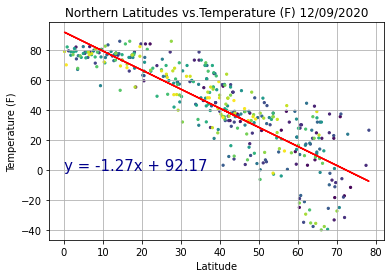

In [145]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

# Number of cities in cleaned northern hemisphere dataframe
n1 = len(northtemp_df. index)

t= np.arange(n1)  # Color scale matched with number of data points
plt.scatter(northtemp_df['Lat'], northtemp_df['Max Temp'], s=5, c=t)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Northern Latitudes vs.Temperature (F) {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Regression Line
x_values = northtemp_df['Lat']
y_values = northtemp_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="darkblue")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig('N Latitude vs.Temperature.png')

plt.show()

In [119]:
print('For every unit of change in latitude the temperature drops ' + str(round(slope,2)) +' units.') 
print('Approximately '+ str(round(rvalue**2,2)) + '% of the data fit into the model.')

For every unit of change in latitude the temperature drops -1.27 units.
Approximately 0.73% of the data fit into the model.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [120]:
# Dataframe for Southern Hemisphere cities
south_df = weather_df[weather_df['Lat'] <= 0]
south_df.sort_values(by=['Lat'])

,City,Lat,Long,Cloudiness,Humidity,Max Temp,Wind Speed,Date
37,ushuaia,-54.80,-68.30,90,93,46.40,8.05,1607553210
115,bluff,-46.60,168.33,91,75,57.09,6.69,1607553227
108,kaitangata,-46.28,169.85,53,66,63.00,7.00,1607553225
5,mataura,-46.19,168.86,99,46,67.87,4.68,1607553203
119,tuatapere,-46.13,167.68,94,71,61.36,4.85,1607553228
...,...,...,...,...,...,...,...,...
339,biak,-0.91,122.88,45,72,80.74,0.96,1607553273
395,manokwari,-0.87,134.08,90,72,82.58,1.66,1607553284
15,hithadhoo,-0.60,73.08,81,71,81.66,9.60,1607553205
398,boende,-0.22,20.87,87,97,69.82,2.42,1607553285


The r-squared is: 0.7253749686341372


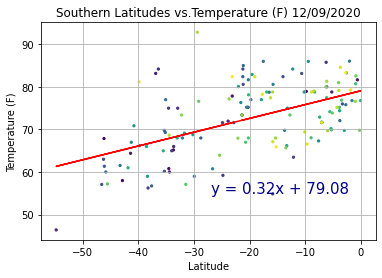

In [146]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
# Number of cities in cleaned southern hemisphere dataframe
n2 = len(south_df. index)
t= np.arange(n2)  # Color scale matched with number of data points
plt.scatter(south_df['Lat'], south_df['Max Temp'], s=5, c=t)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Southern Latitudes vs.Temperature (F) {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Regression Line
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-27,55),fontsize=15,color="darkblue")

# Save the figure
plt.savefig('S Latitude vs.Temperature Reg.png')

plt.show()

In [122]:
print('For every unit of change in latitude the temperature rises.') 
print('A relatively high percentage of the data fit into the model as opposed to other regressions.')


For every unit of change in latitude the temperature rises.
A relatively high percentage of the data fit into the model as opposed to other regressions.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2916833706444369


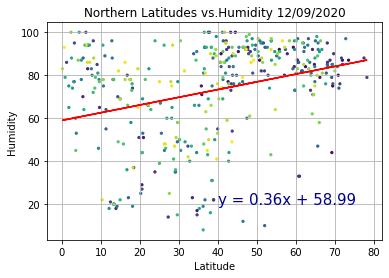

In [147]:
# Northern Hemisphere - Humidity vs. Latitude Linear Regression

# Number of cities in cleaned northern hemisphere dataframe
n1 = len(northtemp_df. index)
t= np.arange(n1)  # Color scale matched with number of data points
plt.scatter(northtemp_df['Lat'], northtemp_df['Humidity'], s=5, c=t)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Latitudes vs.Humidity {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Regression Line
x_values = northtemp_df['Lat']
y_values = northtemp_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="darkblue")

# Save the figure
plt.savefig('N Latitude vs.Humidity Reg.png')

plt.show()

In [124]:
print('For every unit of change in latitude the humidity rises.') 
print('There is a wide distribution of datapoints.')
print('The implication of the r-squared value is that the model offers poor predicatability of results.')
print('Visually this is observed in the wide scatter of datapoints.')

For every unit of change in latitude the humidity rises.
There is a wide distribution of datapoints.
The implication of the r-squared value is that the model offers poor predicatability of results.
Visually this is observed in the wide scatter of datapoints.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09623698960852296


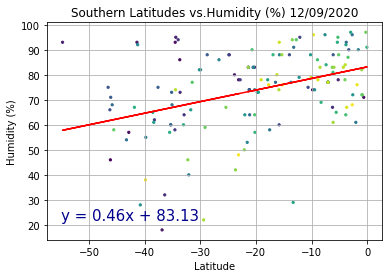

In [148]:
# Southern Hemisphere - Humidity vs. Latitude Linear Regression
# Number of cities in cleaned southern hemisphere dataframe
n2 = len(south_df. index)
t= np.arange(n2)  # Color scale matched with number of data points
plt.scatter(south_df['Lat'], south_df['Humidity'], s=5, c=t)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Latitudes vs.Humidity (%) {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Regression Line
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15,color="darkblue")

# Save the figure
plt.savefig('S Latitude vs.Humidity Reg.png')

plt.show()

In [126]:
print('For every unit of change in latitude the humidity increases ' + str(round(slope,2)) +' units.') 
print('The implication of the r-squared value is that the model offers poor predicatability of results.')
print('Visually this is observed in the wide scatter of datapoints, eg high variance.')

For every unit of change in latitude the humidity increases 0.46 units.
The implication of the r-squared value is that the model offers poor predicatability of results.
Visually this is observed in the wide scatter of datapoints, eg high variance.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15676283706743768


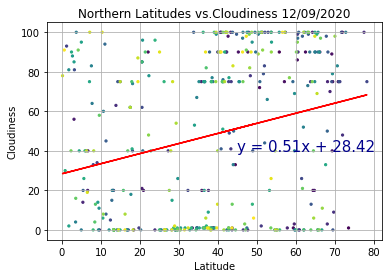

In [149]:
# Northern Hemisphere - Cloudiness vs. Latitude Linear Regression
# Number of cities in cleaned northern hemisphere dataframe
n1 = len(northtemp_df. index)
t= np.arange(n1)  # Color scale matched with number of data points
plt.scatter(northtemp_df['Lat'], northtemp_df['Cloudiness'], s=5, c=t)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Latitudes vs.Cloudiness {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Regression Line
x_values = northtemp_df['Lat']
y_values = northtemp_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="darkblue")

# Save the figure
plt.savefig('N Latitude vs.Cloudiness Reg.png')

plt.show()

In [128]:
print('For every unit of change in latitude the cloudiness increases ' + str(round(slope,2)) +' units.') 
print('The implication of the r-squared value is that the model offers poor predicatability of results.')
print('Visually this is observed in the wide scatter of datapoints , eg high')
print('  variance, with large distributions at the extreme ends of the y-axis.')

For every unit of change in latitude the cloudiness increases 0.51 units.
The implication of the r-squared value is that the model offers poor predicatability of results.
Visually this is observed in the wide scatter of datapoints , eg high
  variance, with large distributions at the extreme ends of the y-axis.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06569556466070872


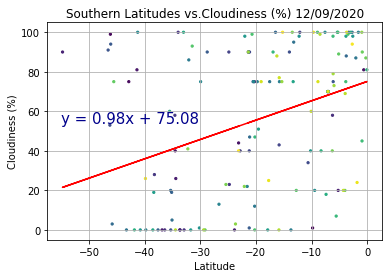

In [150]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# Number of cities in cleaned southern hemisphere dataframe
n2 = len(south_df. index)
t= np.arange(n2)  # Color scale matched with number of data points
plt.scatter(south_df['Lat'], south_df['Cloudiness'], s=5, c=t)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Latitudes vs.Cloudiness (%) {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Regression Line
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,54),fontsize=15,color="darkblue")

# Save the figure
plt.savefig('S Latitude vs.Cloudiness Reg.png')

plt.show()

In [130]:
print('For every unit of change in latitude the cloudiness increases ' + str(round(slope,2)) +' units.') 
print('The implication of the r-squared value is that the model offers poor predicatability of results.')
print('Visually this is observed in the wide scatter of datapoints , eg high')
print('  variance, with large distributions at the extreme ends of the y-axis.')

For every unit of change in latitude the cloudiness increases 0.98 units.
The implication of the r-squared value is that the model offers poor predicatability of results.
Visually this is observed in the wide scatter of datapoints , eg high
  variance, with large distributions at the extreme ends of the y-axis.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1304436432178669


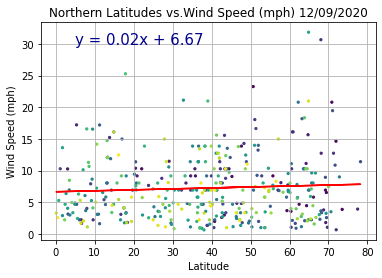

In [151]:
# Northern Hemisphere - Wind Speed vs. Latitude Linear Regression
# Number of cities in cleaned northern hemisphere dataframe
n1 = len(northtemp_df. index)
t= np.arange(n1)  # Color scale matched with number of data points
plt.scatter(northtemp_df['Lat'], northtemp_df['Wind Speed'], s=5, c=t)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Latitudes vs.Wind Speed (mph) {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Regression Line
x_values = northtemp_df['Lat']
y_values = northtemp_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="darkblue")

# Save the figure
plt.savefig('N Latitude vs.Wind Speed Reg.png')

plt.show()

In [132]:
print('For every unit of change in latitude the cloudiness increases ' + str(round(slope,2)) +' units...nearly a flat line.') 
print('The implication of the r-squared value is that the model offers poor predicatability of results.')
print('Visually this is observed in the wide scatter of datapoints , eg high')
print('  variance, with large distributions at the extreme ends of the y-axis.')

For every unit of change in latitude the cloudiness increases 0.02 units...nearly a flat line.
The implication of the r-squared value is that the model offers poor predicatability of results.
Visually this is observed in the wide scatter of datapoints , eg high
  variance, with large distributions at the extreme ends of the y-axis.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.003685976824614773


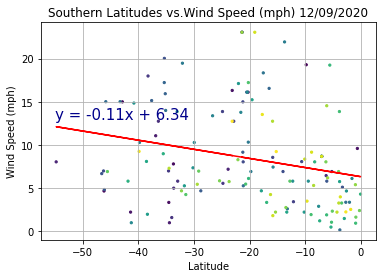

In [152]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# Number of cities in cleaned southern hemisphere dataframe
n2 = len(south_df. index)
t= np.arange(n2)  # Color scale matched with number of data points
plt.scatter(south_df['Lat'], south_df['Wind Speed'], s=5, c=t)

# Title and Labels
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Latitudes vs.Wind Speed (mph) {time.strftime("%m/%d/%Y")}')

plt.grid(True)

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")

# Regression Line
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,13),fontsize=15,color="darkblue")

# Save the figure
plt.savefig('S Latitude vs.Wind Speed Reg.png')

plt.show()

In [134]:
print('For every unit of change in latitude the cloudiness increases ' + str(round(slope,2)) +' units.') 
print('The implication of the r-squared value is that the model offers poor predicatability of results.')
print('Visually this is observed in the wide scatter of datapoints , eg high')
print('  variance, with large distributions at the extreme ends of the y-axis.')

For every unit of change in latitude the cloudiness increases -0.11 units.
The implication of the r-squared value is that the model offers poor predicatability of results.
Visually this is observed in the wide scatter of datapoints , eg high
  variance, with large distributions at the extreme ends of the y-axis.
